In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size'   : 22}	
mpl.rc('font', **font)

In [2]:
df = pd.read_csv("./bases/suicide/suicidios.csv") 

In [3]:
df2 = pd.read_csv("./bases/wdi/Country.csv")

In [4]:
df2.replace(["Slovak Republic", "Kyrgyz Republic","St. Lucia","Bahamas, The","Korea, Dem. Rep.","St. Vincent and the Grenadines","Russia"], ['Slovakia', 'Kyrgyzstan', 'Saint Lucia', 'Bahamas', 'Republic of Korea', 'Saint Vincent and Grenadines','Russian Federation'], inplace=True)                                 
filtro2 = df2.TableName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'])
df2 = df2[filtro2].reset_index(drop=True)
df2.rename(columns={'ShortName':'country','CountryCode':'countrycode'}, inplace=True)

In [5]:
df_inner = pd.merge(df2[['country','countrycode','Region']], df, on='country', how='inner')

In [6]:
df3 = df_inner.groupby(['Region','year']).agg(np.sum).reset_index()
df3['suicides100'] = (df3['suicides'] * 100000 ) / df3['population']

In [7]:
df3['Region'].unique()
df4 = df3.replace({'East Asia & Pacific':0,'Europe & Central Asia':1,
       'Latin America & Caribbean':2, 'Middle East & North Africa':3,
       'North America':4, 'Sub-Saharan Africa':5})
df4

,Region,year,Unnamed: 0,population,suicides,suicides100
0,0,2000,4272,217653826.0,38365.000000,17.626614
1,0,2001,4278,218938052.0,37481.000000,17.119454
2,0,2002,4284,220109705.0,37766.000000,17.157808
3,0,2003,4290,221127006.0,39370.000000,17.804248
4,0,2004,4296,221963149.0,37298.000000,16.803690
5,0,2005,4302,222814749.0,37316.500000,16.747769
6,0,2006,4308,223789440.0,36417.000000,16.272886
7,0,2007,4314,224671426.0,37483.000000,16.683474
8,0,2008,4320,225800496.0,37068.000000,16.416262
9,0,2009,4326,226762707.0,37534.000000,16.552104


Text(0, 0.5, 'suicidio por 100.000')

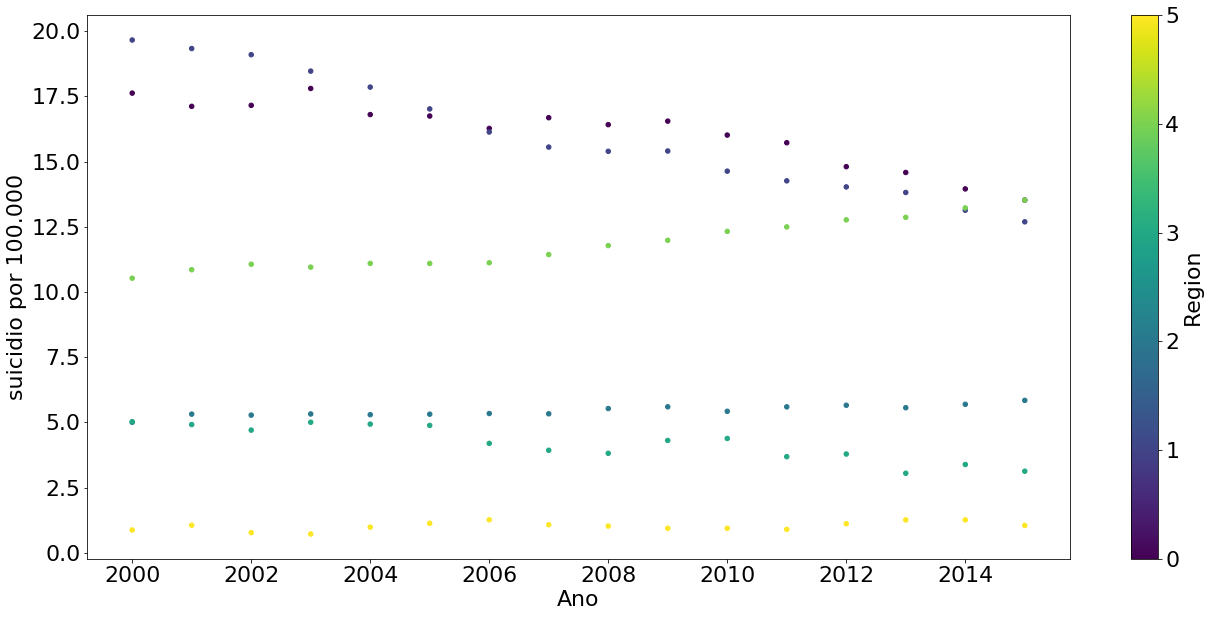

In [10]:
fig, ax = plt.subplots(figsize=(22, 10))
df4.plot.scatter('year','suicides100',c='Region', ax=ax,colormap='viridis')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")